In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Assuming you have the weights and biases for the original network
# Replace these with your actual values
original_weights = {
    'hidden_layer1': torch.randn(8, 2),
    'hidden_layer2': torch.randn(8, 8),
    'output_layer': torch.randn(1, 8),
}

original_biases = {
    'hidden_layer1': torch.randn(8),
    'hidden_layer2': torch.randn(8),
    'output_layer': torch.randn(1),
}

# Define the architecture of the new network
new_input_size = 2
new_hidden_layers = [8, 8]
new_output_size = 1

# Create a new model with the same architecture as the original one
class NewModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(NewModel, self).__init__()
        
        # Input layer
        self.input_layer = nn.Linear(input_size, hidden_layers[0])
        
        # Hidden layers with weights and biases from the original model
        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers)-1)
        ])
        
        # Output layer
        self.output_layer = nn.Linear(hidden_layers[-1], output_size)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

# Create an instance of the new model
new_model = NewModel(new_input_size, new_hidden_layers, new_output_size)

# Set the weights and biases from the original model
new_model.input_layer.weight.data = torch.transpose(original_weights['hidden_layer1'], 0, 1)
new_model.input_layer.bias.data = original_biases['hidden_layer1']

for i, layer in enumerate(new_model.hidden_layers):
    layer.weight.data = torch.transpose(original_weights[f'hidden_layer{i+2}'], 0, 1)
    layer.bias.data = original_biases[f'hidden_layer{i+2}']

new_model.output_layer.weight.data = torch.transpose(original_weights['output_layer'], 0, 1)
new_model.output_layer.bias.data = original_biases['output_layer']

# Visualize the differences in weights and biases
def visualize_difference(original, new, layer_name):
    plt.figure(figsize=(10, 4))
    
    # Plot weights
    plt.subplot(1, 2, 1)
    plt.title(f'{layer_name} Weights')
    plt.imshow(original, cmap='viridis')
    plt.colorbar(label='Weight Values')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.subplot(1, 2, 2)
    plt.title(f'Difference in {layer_name} Weights')
    plt.imshow(new - original, cmap='coolwarm')
    plt.colorbar(label='Weight Difference')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.tight_layout()
    plt.show()

# Visualize differences for each layer
for layer_name, original_weight in original_weights.items():
    new_weight = getattr(new_model, layer_name).weight.data
    visualize_difference(original_weight, new_weight, layer_name)

# Visualize differences for biases
for layer_name, original_bias in original_biases.items():
    new_bias = getattr(new_model, layer_name).bias.data
    visualize_difference(original_bias.unsqueeze(0), new_bias.unsqueeze(0), layer_name + ' Bias')

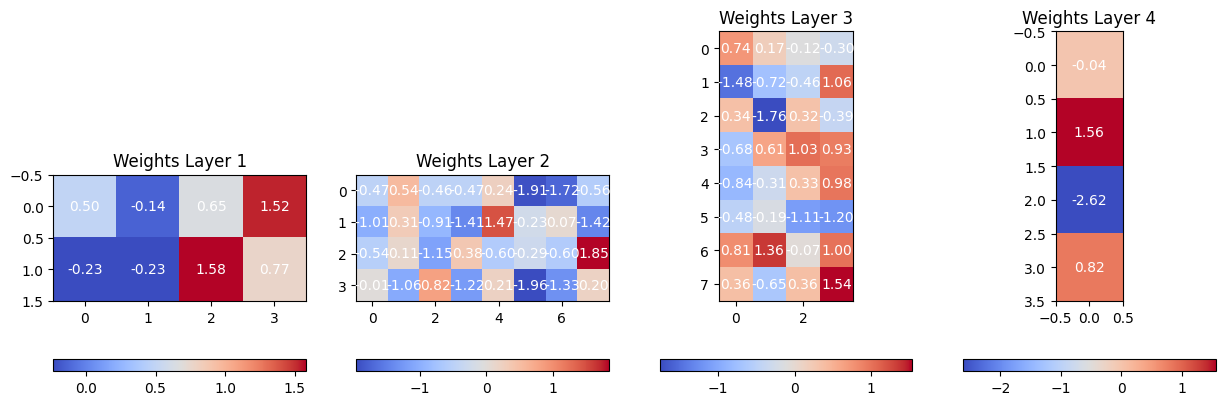

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def plot_weights(ax, weights, title):
    im = ax.imshow(weights, cmap='coolwarm', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
layer_sizes = [2, 4, 8, 4, 1]

# Initialize random weights
np.random.seed(42)
weights = [np.random.randn(layer_sizes[i], layer_sizes[i+1]) for i in range(len(layer_sizes)-1)]

# Create a figure for visualization
fig, axes = plt.subplots(1, len(layer_sizes)-1, figsize=(15, 5))

# Plot the weights for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Weights Layer {i+1}')

    # Show the colorbars
    fig.colorbar(im, ax=ax, orientation='horizontal')

# Show the plots
plt.show()


TypeError: Invalid shape (4,) for image data

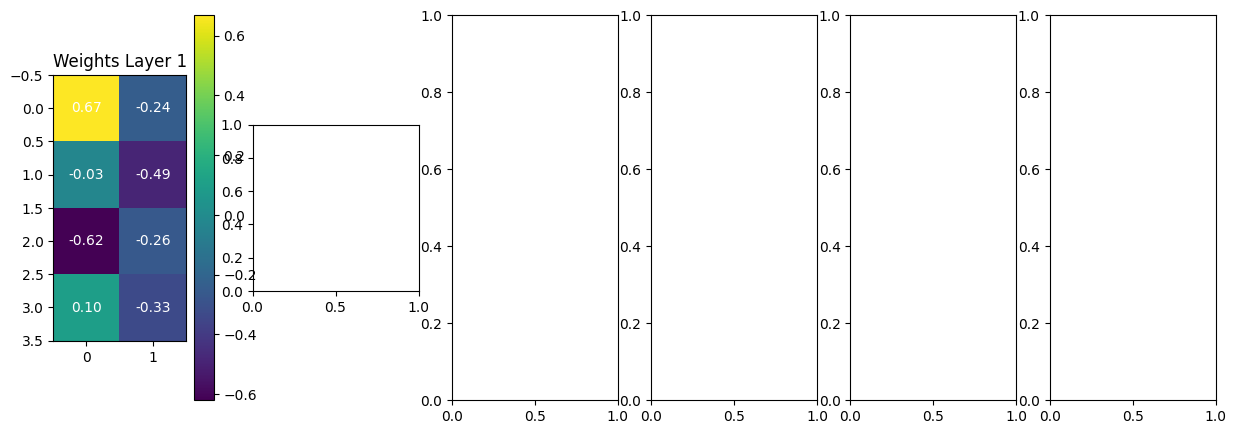

In [14]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights from the model
state_dict = model.state_dict()

# Extract weights from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Weights Layer {i+1}')

    # Show the colorbars
    fig.colorbar(im, ax=ax, orientation='vertical')

# Show the plots
plt.show()

In [15]:
weights

[array([[ 0.66814834, -0.24079405],
        [-0.02834418, -0.48879123],
        [-0.6212161 , -0.26349914],
        [ 0.10137405, -0.33160928]], dtype=float32),
 array([-0.23954405,  0.31863692, -0.38037   ,  0.10408586], dtype=float32),
 array([[ 0.08818406, -0.19010818,  0.17889965,  0.12321895],
        [ 0.46940237,  0.19964784,  0.08524168, -0.2766676 ],
        [-0.43425298,  0.14303488, -0.14181459,  0.23964179],
        [-0.25579917, -0.10452104,  0.05287874,  0.18901742]],
       dtype=float32),
 array([-0.14760482,  0.35476416, -0.1190151 , -0.22649938], dtype=float32),
 array([[-0.1504693 , -0.45207846,  0.32741886, -0.13531387]],
       dtype=float32),
 array([-0.2903058], dtype=float32)]

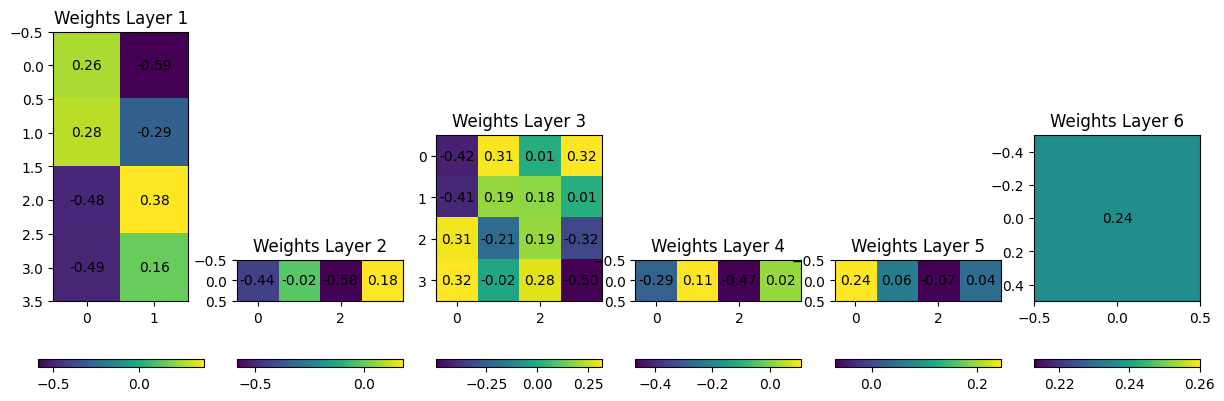

In [24]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='black', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights from the model
state_dict = model.state_dict()

# Extract weights from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Weights Layer {i+1}')

    # Show the colorbars
    fig.colorbar(im, ax=ax, orientation='horizontal')

# Show the plots
plt.show()


In [20]:
type(weights)

list

In [23]:
weights.shape

AttributeError: 'list' object has no attribute 'shape'

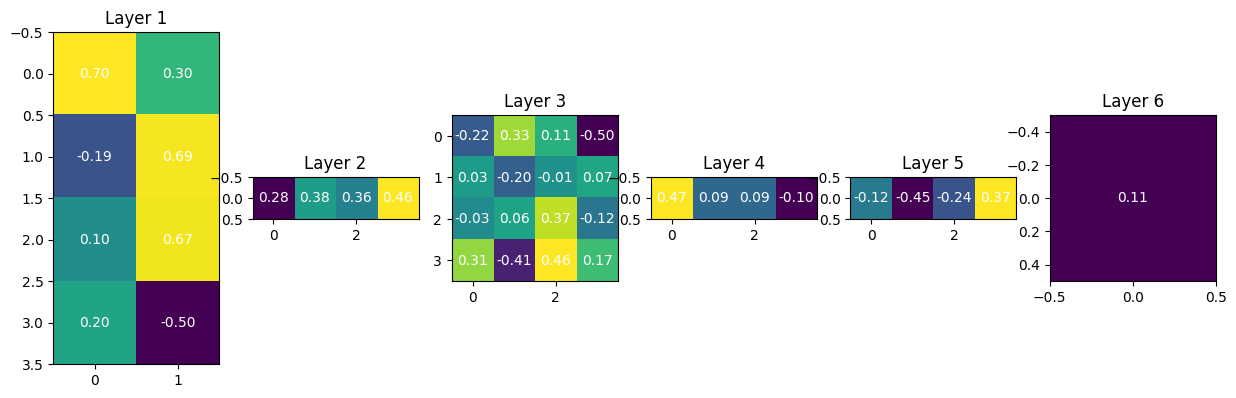

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Extract weights and biases from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights and biases for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Layer {i+1}')

    # Show the colorbars
    #fig.colorbar(im, ax=ax, orientation='vertical')

# Show the plots
plt.show()


IndexError: index 1 is out of bounds for axis 0 with size 1

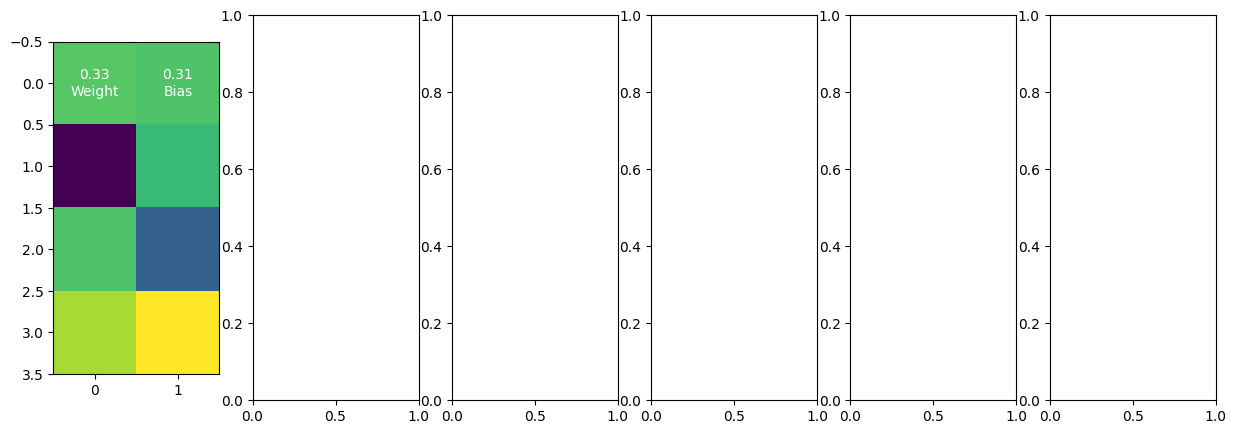

In [27]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title, labels):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers and labels to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}\n{labels[i, j]}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Extract weights and biases from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create labels to indicate weights or biases
labels = np.array([['Weight' if 'weight' in key else 'Bias' for key in state_dict.keys()]])

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights and biases for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Layer {i+1}', labels)

    # Show the colorbars
    fig.colorbar(im, ax=ax, orientation='vertical')

# Show the plots
plt.show()


IndexError: index 1 is out of bounds for axis 0 with size 1

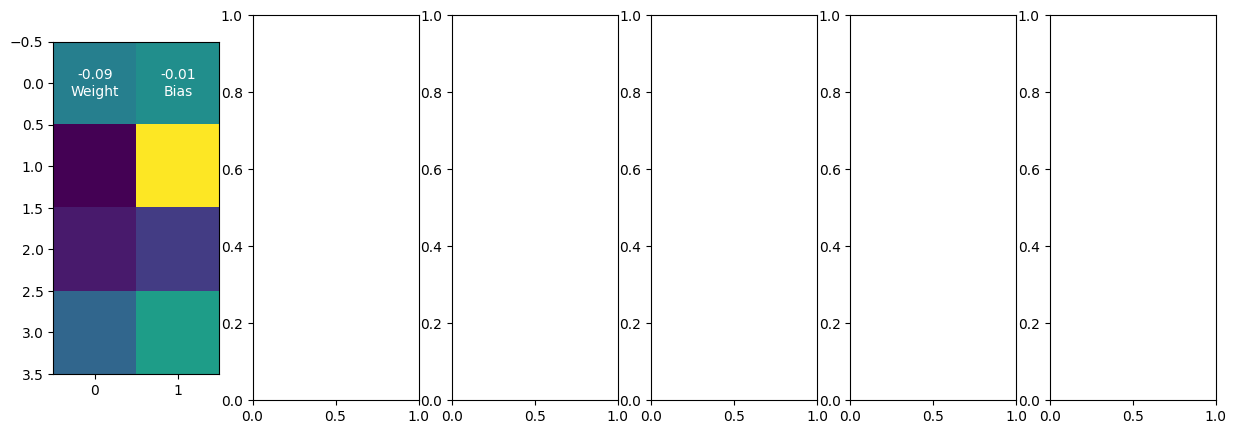

In [29]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title, labels):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers and labels to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}\n{labels[i, j]}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Extract weights and biases from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create labels to indicate weights or biases
labels = np.array([['Weight' if 'weight' in key else 'Bias' for key in state_dict.keys()]])  # Note the extra square brackets

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights and biases for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Layer {i+1}', labels)

    # Show the colorbars
    fig.colorbar(im, ax=ax, orientation='vertical')

# Show the plots
plt.show()


IndexError: index 1 is out of bounds for axis 0 with size 1

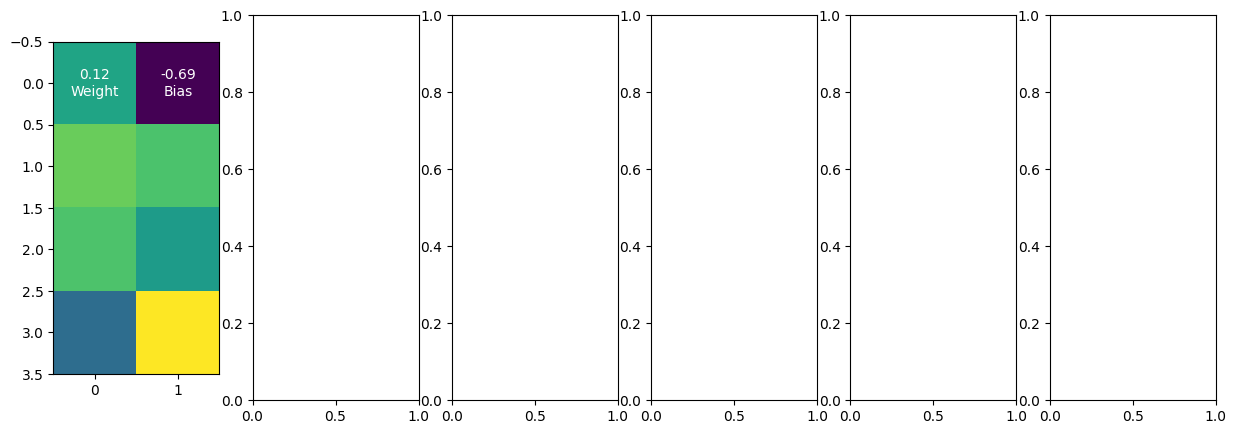

In [30]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title, labels):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers and labels to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}\n{labels[i, j]}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Extract weights and biases from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create labels to indicate weights or biases
labels = np.array([['Weight' if 'weight' in key else 'Bias' for key in state_dict.keys()]])

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights and biases for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Layer {i+1}', labels)

    # Show the colorbars
    fig.colorbar(im, ax=ax, orientation='vertical')

# Show the plots
plt.show()


In [36]:
state_dict

OrderedDict([('fc1.weight',
              tensor([[ 0.1210, -0.6868],
                      [ 0.3766,  0.3029],
                      [ 0.3086,  0.0694],
                      [-0.1932,  0.6945]])),
             ('fc1.bias', tensor([ 0.6541, -0.2102,  0.5089, -0.4117])),
             ('fc2.weight',
              tensor([[ 0.1940, -0.3580, -0.3531, -0.3261],
                      [-0.4347,  0.0170, -0.2992, -0.0377],
                      [-0.0155,  0.1227,  0.1890,  0.2674],
                      [ 0.4908, -0.4107, -0.2928,  0.0270]])),
             ('fc2.bias', tensor([ 0.4497, -0.3766,  0.3315,  0.4400])),
             ('fc3.weight', tensor([[ 0.3167, -0.3379,  0.1104,  0.0695]])),
             ('fc3.bias', tensor([0.1578]))])

In [37]:
labels

array([['Weight', 'Bias', 'Weight', 'Bias', 'Weight', 'Bias']],
      dtype='<U6')

RuntimeError: The size of tensor a (16) must match the size of tensor b (8) at non-singleton dimension 0

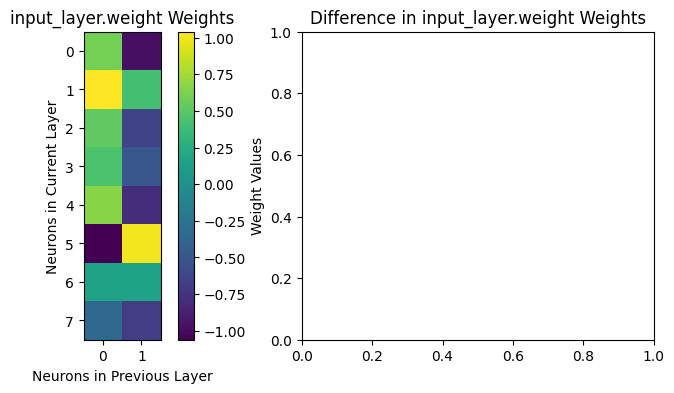

In [1]:
import torch
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt

# Define the architecture of the original network
original_input_size = 2
original_hidden_layers = [8, 8]
original_output_size = 1

# Create the original model with Xavier initialization
class OriginalModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(OriginalModel, self).__init__()
        
        # Input layer
        self.input_layer = nn.Linear(input_size, hidden_layers[0])
        init.xavier_uniform_(self.input_layer.weight.data, gain=nn.init.calculate_gain('relu'))
        init.zeros_(self.input_layer.bias.data)
        
        # Hidden layers with Xavier initialization
        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers)-1)
        ])
        for layer in self.hidden_layers:
            init.xavier_uniform_(layer.weight.data, gain=nn.init.calculate_gain('relu'))
            init.zeros_(layer.bias.data)
        
        # Output layer with Xavier initialization
        self.output_layer = nn.Linear(hidden_layers[-1], output_size)
        init.xavier_uniform_(self.output_layer.weight.data, gain=nn.init.calculate_gain('linear'))
        init.zeros_(self.output_layer.bias.data)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

# Create an instance of the original model
original_model = OriginalModel(original_input_size, original_hidden_layers, original_output_size)

# Define the architecture of the new network with increased neurons
new_input_size = 2
new_hidden_layers = [16, 16]  # Increase the number of neurons
new_output_size = 1

# Create a new model with the same architecture as the original one
class NewModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(NewModel, self).__init__()
        
        # Input layer
        self.input_layer = nn.Linear(input_size, hidden_layers[0])
        
        # Hidden layers with weights and biases from the original model
        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers)-1)
        ])
        
        # Output layer
        self.output_layer = nn.Linear(hidden_layers[-1], output_size)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

# Create an instance of the new model
new_model = NewModel(new_input_size, new_hidden_layers, new_output_size)

# Set the weights from the original model using He initialization
def initialize_weights_he(model):
    for layer in model.modules():
        if isinstance(layer, nn.Linear):
            init.kaiming_uniform_(layer.weight.data, mode='fan_in', nonlinearity='relu')
            init.zeros_(layer.bias.data)

# Initialize weights of the new model using He initialization
initialize_weights_he(new_model)

# Visualize the differences in weights and biases
def visualize_difference(original, new, layer_name):
    plt.figure(figsize=(10, 4))
    
    # Plot weights
    plt.subplot(1, 2, 1)
    plt.title(f'{layer_name} Weights')
    plt.imshow(original, cmap='viridis')
    plt.colorbar(label='Weight Values')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.subplot(1, 2, 2)
    plt.title(f'Difference in {layer_name} Weights')
    plt.imshow(new - original, cmap='coolwarm')
    plt.colorbar(label='Weight Difference')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.tight_layout()
    plt.show()

# Visualize differences for each layer
for layer_name, original_weight in original_model.state_dict().items():
    new_weight = new_model.state_dict()[layer_name]
    visualize_difference(original_weight, new_weight, layer_name)

# Visualize differences for biases
for layer_name, original_bias in original_model.state_dict().items():
    if 'bias' in layer_name:
        new_bias = new_model.state_dict()[layer_name]
        visualize_difference(original_bias.unsqueeze(0), new_bias.unsqueeze(0), layer_name + ' Bias')


# ADAPTIVE SCHEME II

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the original model
class OriginalModel(nn.Module):
    def __init__(self):
        super(OriginalModel, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 4)
        self.output = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.output(x)
        return x

# Train and save the original model
original_model = OriginalModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(original_model.parameters(), lr=0.01)

# Dummy data for training
input_data = torch.rand((100, 2))
target_data = torch.rand((100, 1))

original_weights = []  # List to store original model weights

for epoch in range(100):
    optimizer.zero_grad()
    output = original_model(input_data)
    loss = criterion(output, target_data)
    loss.backward()
    optimizer.step()

    # Store the weights for visualization
    original_weights.append(original_model.fc1.weight.data.numpy().flatten())

# Save the weights and biases
torch.save(original_model.state_dict(), 'original_model.pth')

# Define the new model with an additional hidden layer
class NewModel(nn.Module):
    def __init__(self):
        super(NewModel, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 4)
        self.new_layer = nn.Linear(4, 4)  # Additional hidden layer
        self.output = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.new_layer(x))
        x = self.output(x)
        return x

# Initialize the new model with the weights and biases of the original model
new_model = NewModel()
new_model.load_state_dict(torch.load('original_model.pth'))

# Check the weights of the new model
new_weights = []
for epoch in range(10):  # Only for visualization, you can further train as needed
    # Store the weights for visualization
    new_weights.append(new_model.fc1.weight.data.numpy().flatten())

# Plotting the weights
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(original_weights)
plt.title('Original Model Weights')
plt.xlabel('Epoch')
plt.ylabel('Weight Values')

plt.subplot(1, 2, 2)
plt.plot(new_weights)
plt.title('New Model Weights (Initialized from Original)')
plt.xlabel('Epoch')
plt.ylabel('Weight Values')

plt.tight_layout()
plt.show()


RuntimeError: Error(s) in loading state_dict for NewModel:
	Missing key(s) in state_dict: "new_layer.weight", "new_layer.bias". 

# Initialization and activation function

In [2]:
import torch.nn as nn
import torch.nn.init as init

class FCN(nn.Module):
    def __init__(self, input_size, output_size, hidden_sizes, activation='relu', initialization='xavier'):
        super(FCN, self).__init__()

        # Define input and output layers
        self.input_layer = nn.Linear(input_size, hidden_sizes[0])
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

        # Define hidden layers
        self.hidden_layers = nn.ModuleList([
            nn.Linear(in_size, out_size) for in_size, out_size in zip(hidden_sizes[:-1], hidden_sizes[1:])
        ])

        # Define ModuleDict for activation functions
        self.activations = nn.ModuleDict({
            'relu': nn.ReLU(),
            'tanh': nn.Tanh(),
        })

        # Initialize layers
        self.init_weights(initialization)

        # Set activation function
        if activation not in self.activations:
            raise ValueError("Unsupported activation function")
        self.activation = self.activations[activation]

    def forward(self, x):
        x = self.input_layer(x)

        for hidden_layer in self.hidden_layers:
            x = self.activation(hidden_layer(x))

        x = self.output_layer(x)
        return x

    def init_weights(self, initialization):
        # Initialize input layer
        if initialization == 'xavier':
            init.xavier_uniform_(self.input_layer.weight)
        elif initialization == 'kaiming':
            init.kaiming_uniform_(self.input_layer.weight, nonlinearity='relu')
        elif initialization == 'zeros':
            init.zeros_(self.input_layer.weight)
        else:
            raise ValueError("Unsupported initialization type")

        # Initialize hidden layers
        for hidden_layer in self.hidden_layers:
            if initialization == 'xavier':
                init.xavier_uniform_(hidden_layer.weight)
            elif initialization == 'kaiming':
                init.kaiming_uniform_(hidden_layer.weight, nonlinearity='relu')
            elif initialization == 'zeros':
                init.zeros_(hidden_layer.weight)
            else:
                raise ValueError("Unsupported initialization type")

        # Initialize output layer
        if initialization == 'xavier':
            init.xavier_uniform_(self.output_layer.weight)
        elif initialization == 'kaiming':
            init.kaiming_uniform_(self.output_layer.weight, nonlinearity='relu')
        elif initialization == 'zeros':
            init.zeros_(self.output_layer.weight)
        else:
            raise ValueError("Unsupported initialization type")

# Example usage:
input_size = 10
output_size = 5
hidden_sizes = [20, 30, 15, 10, 25]  # You can specify any number of neurons in each hidden layer

# Create an instance of FCN with ReLU activation and Xavier initialization
model = FCN(input_size, output_size, hidden_sizes, activation='relu', initialization='xavier')

# Check the model architecture
print(model)


FCN(
  (input_layer): Linear(in_features=10, out_features=20, bias=True)
  (output_layer): Linear(in_features=25, out_features=5, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=20, out_features=30, bias=True)
    (1): Linear(in_features=30, out_features=15, bias=True)
    (2): Linear(in_features=15, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=25, bias=True)
  )
  (activations): ModuleDict(
    (relu): ReLU()
    (tanh): Tanh()
  )
  (activation): ReLU()
)


## Visualization of the weights and biases

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

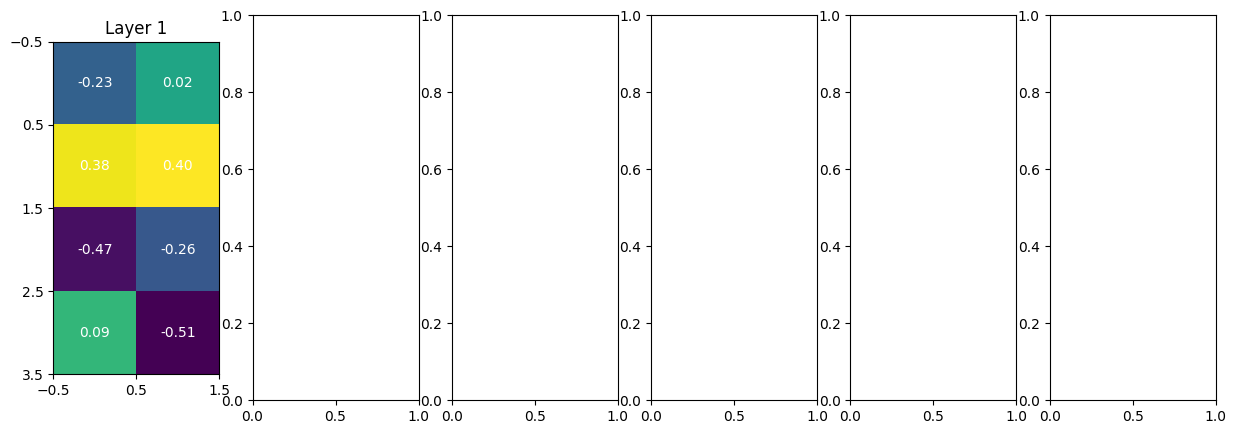

In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Extract weights and biases from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights and biases for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Layer {i+1}')

    # Show the colorbars
    #fig.colorbar(im, ax=ax, orientation='vertical')

# Show the plots
plt.show()

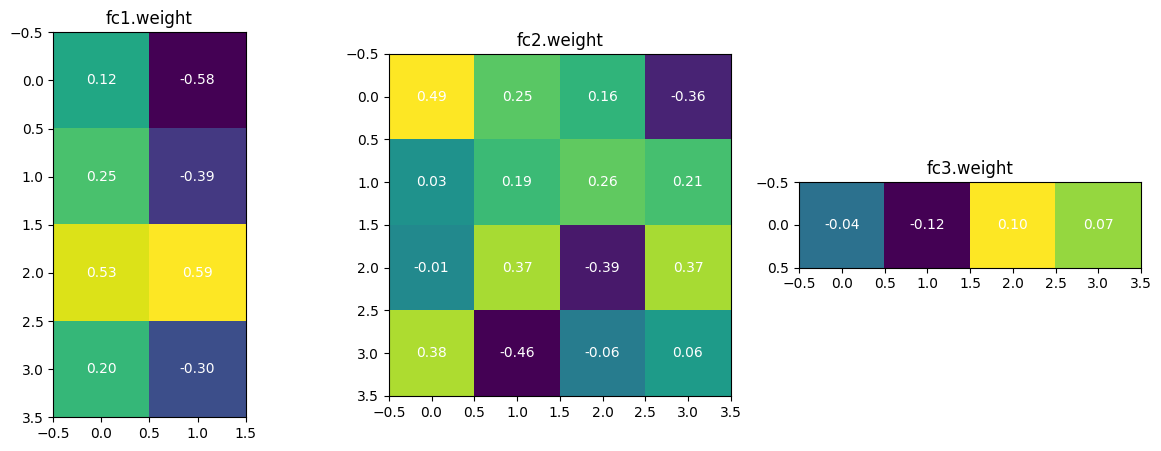

In [5]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)

    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Filter out keys containing "bias"
weights_dict = {key: value for key, value in state_dict.items() if 'bias' not in key}

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights_dict), figsize=(15, 5))

# Plot the weights for each layer using a for-loop
for i, (key, weights) in enumerate(weights_dict.items()):
    im = plot_weights(axes[i], weights.numpy(), f'{key}')

# Show the plots
plt.show()


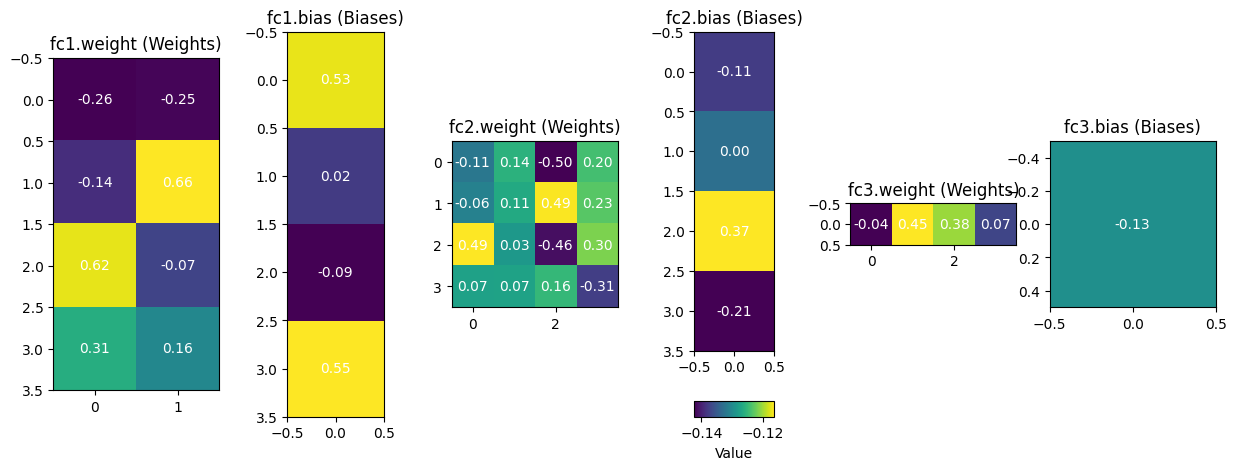

In [12]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Combine both dictionaries for weights and biases into a single dictionary
weights_biases_dict = {key: value for key, value in state_dict.items()}

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights_biases_dict), figsize=(15, 5))

# Plot the weights and biases for each layer
for i, (key, data) in enumerate(weights_biases_dict.items()):
    if 'bias' in key:
        im = plot_weights(axes[i], data.numpy().reshape(-1, 1), f'{key} (Biases)')
    elif 'weight' in key:
        im = plot_weights(axes[i], data.numpy(), f'{key} (Weights)')
# Add a colorbar for all the plots
divider = make_axes_locatable(axes[-3])
cax = divider.append_axes("bottom", size="5%", pad=0.5)
cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
cbar.set_label('Value')
# Show the plots
plt.show()


AttributeError: 'Colorbar' object has no attribute 'set_clim'

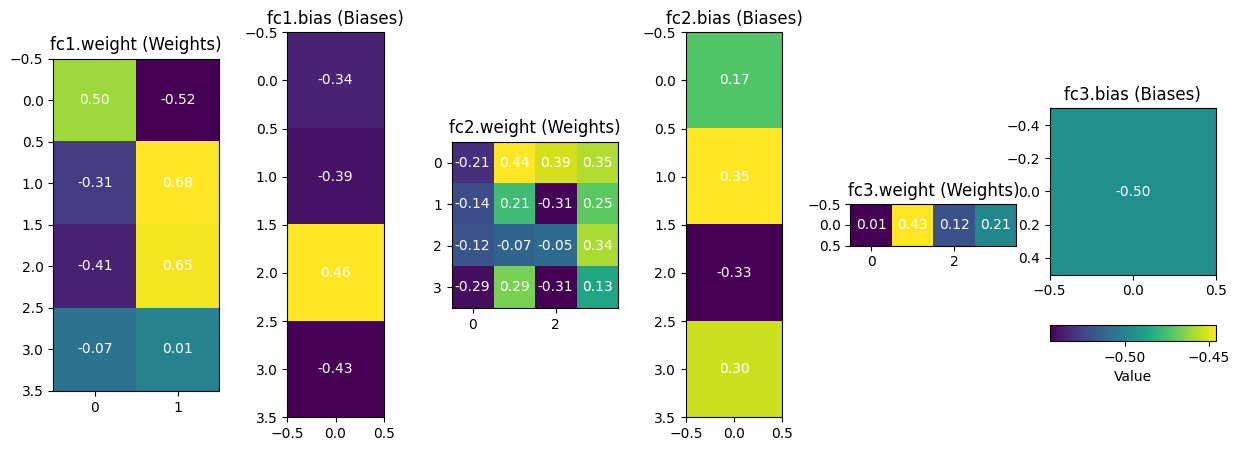

In [13]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Combine both dictionaries for weights and biases into a single dictionary
weights_biases_dict = {key: value for key, value in state_dict.items()}

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights_biases_dict), figsize=(15, 5))

# Plot the weights and biases for each layer
max_intensity = 0  # Track the maximum intensity across all plots
for i, (key, data) in enumerate(weights_biases_dict.items()):
    if 'bias' in key:
        im = plot_weights(axes[i], data.numpy().reshape(-1, 1), f'{key} (Biases)')
    elif 'weight' in key:
        im = plot_weights(axes[i], data.numpy(), f'{key} (Weights)')
    
    max_intensity = max(max_intensity, np.max(np.abs(data.numpy())))  # Update max intensity

# Add a colorbar below all the plots
divider = make_axes_locatable(axes[-1])
cax = divider.append_axes("bottom", size="10%", pad=0.5)
cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
cbar.set_label('Value')

# Normalize the color bar based on the maximum intensity across all plots
cbar.set_clim(-max_intensity, max_intensity)

# Show the plots
plt.show()


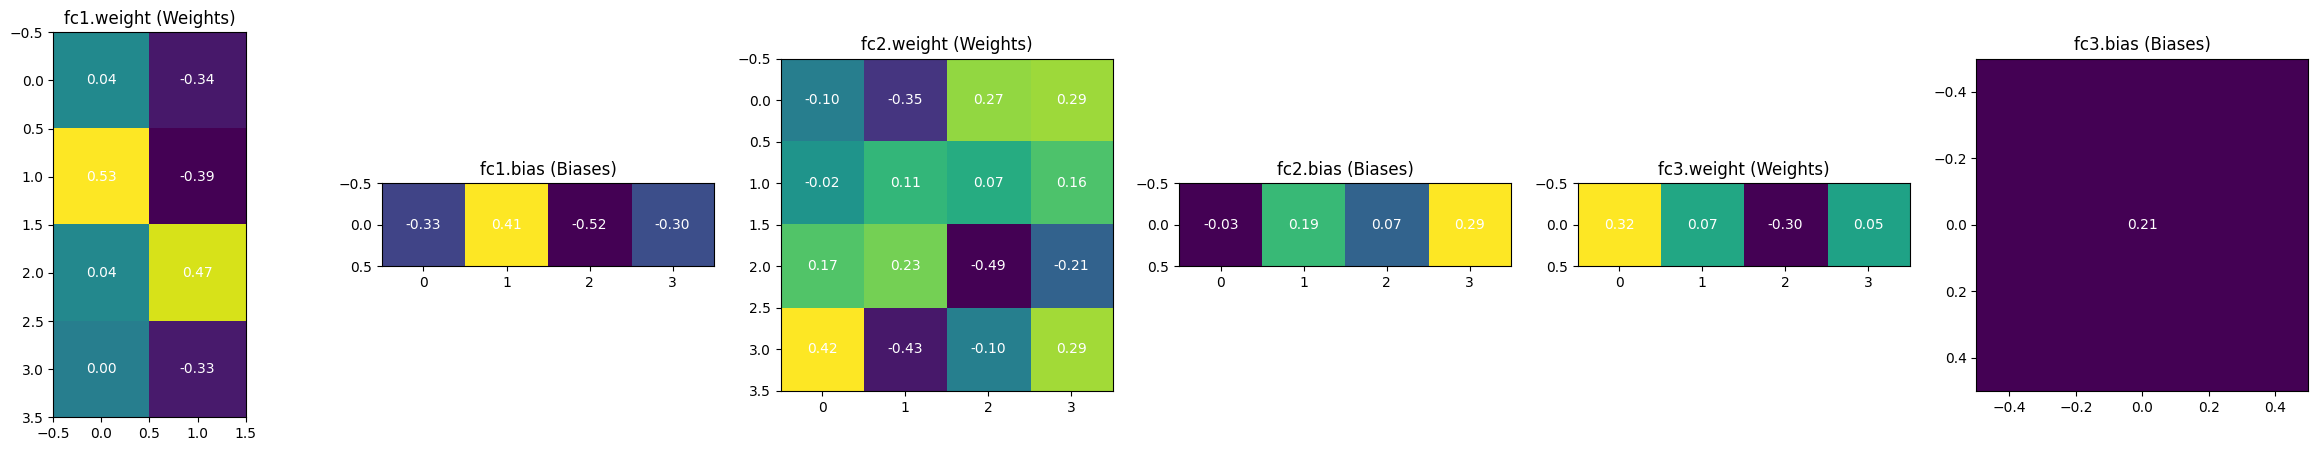

In [17]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def plot_weights(self):
        state_dict = self.state_dict()
        weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Create a figure for visualization
        num_plots = len(weights_biases_dict)
        fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))

        # Plot the weights and biases for each layer
        #max_intensity = 0  # Track the maximum intensity across all plots
        for i, (key, data) in enumerate(weights_biases_dict.items()):
            ax = axes[i] if num_plots > 1 else axes
            if 'bias' in key:
                title = f'{key} (Biases)'
            elif 'weight' in key:
                title = f'{key} (Weights)'
                
            if len(data.shape) == 1:
                # If the data is 1D (possibly biases), reshape them to (1, len(data))
                data = data.reshape(1, -1)
                
            im = ax.imshow(data.numpy(), cmap='viridis', interpolation='none')

            # Add numbers to the cells
            for i in range(data.shape[0]):
                for j in range(data.shape[1]):
                    ax.text(j, i, f'{data[i, j]:.2f}', color='white', ha='center', va='center')

            ax.set_title(title)
            #max_intensity = max(max_intensity, np.max(np.abs(data.numpy())))  # Update max intensity

        # Add a colorbar below all the plots
        #divider = make_axes_locatable(ax)
        #cax = divider.append_axes("bottom", size="5%", pad=0.5)
        #cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
        #cbar.set_label('Value')

        # Normalize the color bar based on the maximum intensity across all plots
        #cbar.set_clim(-max_intensity, max_intensity)

        # Show the plots
        plt.show()

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Call the plot_weights method
model.plot_weights()


In [45]:
import torch
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt

class FCN(nn.Module):
    def __init__(self, N_INPUT, N_OUTPUT, hidden_layers, activation='Tanh', initialization='He'):
        super().__init__()

        self.activation_functions = nn.ModuleDict([
            ["Tanh", nn.Tanh()],
            ["ReLU", nn.ReLU()],
            ["LeakyReLU", nn.LeakyReLU()],
            ["Sigmoid", nn.Sigmoid()],
            ["Softmax", nn.Softmax(dim=-1)],
        ])

        if activation not in self.activation_functions:
            raise ValueError("Unsupported activation function")

        self.activation = self.activation_functions[activation]

        self.fcs = nn.Sequential(
            nn.Linear(N_INPUT, hidden_layers[0]),
            self.activation
        )

        self.fch = nn.ModuleList([
            nn.Sequential(
                nn.Linear(hidden_layers[i], hidden_layers[i + 1]),
                self.activation
            ) for i in range(len(hidden_layers) - 1)
        ])

        self.fce = nn.Linear(hidden_layers[-1], N_OUTPUT)

        self.initialize_parameters(initialization)


    def forward(self, x):
        x = self.fcs(x)
        for layer in self.fch:
            x = self.activation(layer(x))
        x = self.fce(x)
        return x
    
    def initialize_parameters(self, initialization):
        for module in self.modules():
            if isinstance(module, nn.Linear):
                if initialization == 'Uniform':
                    init.uniform_(module.weight.data, -0.1, 0.1)
                    init.zeros_(module.bias.data)
                elif initialization == 'Normal':
                    init.normal_(module.weight.data, mean=0, std=0.01)
                    init.zeros_(module.bias.data)
                elif initialization == 'Xavier':
                    init.xavier_uniform_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'He':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='relu')
                    init.zeros_(module.bias.data)
                elif initialization == 'Orthogonal':
                    init.orthogonal_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'Kaiming':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='leaky_relu')
                    init.zeros_(module.bias.data)
                else:
                    raise ValueError("Unsupported initialization type")

    def plot_weights(self):
        state_dict = self.state_dict()
        weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Create a figure for visualization
        num_subplots = len(weights_biases_dict)
        num_cols = 2
        num_rows = (num_subplots + num_cols -1) // num_cols
        #fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))
        fig, axes = plt.subplots(num_rows,
                                 ncols, 
                                 figsize=(5*num_plots, 5)
                                )

        # Plot the weights and biases for each layer
        #max_intensity = 0  # Track the maximum intensity across all plots
        for i, (key, data) in enumerate(weights_biases_dict.items()):
            ax = axes[i] if num_plots > 1 else axes
            if 'bias' in key:
                title = f'{key} (Biases)'
            elif 'weight' in key:
                title = f'{key} (Weights)'
                
            if len(data.shape) == 1:
                # If the data is 1D (possibly biases), reshape them to (1, len(data))
                data = data.reshape(1, -1)
                
            im = ax.imshow(data.numpy(), cmap='viridis', interpolation='none')

            # Add numbers to the cells
            for i in range(data.shape[0]):
                for j in range(data.shape[1]):
                    ax.text(j, i, f'{data[i, j]:.2f}', color='white', ha='center', va='center')

            ax.set_title(title)
            #max_intensity = max(max_intensity, np.max(np.abs(data.numpy())))  # Update max intensity

        # Add a colorbar below all the plots
        #divider = make_axes_locatable(ax)
        #cax = divider.append_axes("bottom", size="5%", pad=0.5)
        #cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
        #cbar.set_label('Value')

        # Normalize the color bar based on the maximum intensity across all plots
        #cbar.set_clim(-max_intensity, max_intensity)

        # Show the plots
        plt.show()

    def visualize_difference(self, original, new, layer_name):
        plt.figure(figsize=(10, 4))

        # Plot weights
        plt.subplot(1, 2, 1)
        plt.title(f'{layer_name} Weights')
        plt.imshow(original, cmap='viridis')
        plt.colorbar(label='Weight Values')
        plt.xlabel('Neurons in Previous Layer')
        plt.ylabel('Neurons in Current Layer')

        plt.subplot(1, 2, 2)
        plt.title(f'Difference in {layer_name} Weights')
        plt.imshow(new - original, cmap='coolwarm')
        plt.colorbar(label='Weight Difference')
        plt.xlabel('Neurons in Previous Layer')
        plt.ylabel('Neurons in Current Layer')

        plt.tight_layout()
        plt.show()

# Step 1: Create the original model
original_input_size = 2
original_hidden_layers = [8, 8]
original_output_size = 1
original_model = FCN(original_input_size, original_output_size, original_hidden_layers, activation='Tanh', initialization='He')
original_model.plot_weights()



NameError: name 'ncols' is not defined

In [ ]:
# Plot each tensor using Matplotlib
for idx, (key, tensor) in enumerate(tensor_dict.items()):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].imshow(tensor, cmap='gray')  # Adjust colormap as needed
    axs[row, col].set_title(key)
    axs[row, col].axis('off')  # Turn off axis
    axs[row, col].set_aspect('auto')  # Set aspect ratio to auto
# Plot data in each subplot
for i, ax in enumerate(axs.flat):
    if i < num_subplots:
        ax.plot(x, y)
        ax.set_title(f"Subplot {i+1}")
    else:
        ax.axis('off')  # Hide extra subplots
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
state_dict = original_model.state_dict()
weights_biases_dict = {key: value for key, value in state_dict.items()}
type(weights_biases_dict['fcs.0.weight'].numpy())

In [ ]:
# Create a figure for visualization
num_plots = len(weights_biases_dict)
#fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))
fig, axes = plt.subplots(nrows = (num_plots +1)//2,
                                 ncols = 2, 
                                 figsize=(5*num_plots, 5)
                                )

In [ ]:

# Step 2: Visualize the weights and biases of the original model
for layer_name, param in original_model.named_parameters():
    original_weight = param.detach().numpy()
    original_model.visualize_difference(original_weight, original_weight, layer_name)

# Step 3: Create the extended model with 16 neurons in hidden layers and ReLU activation
extended_hidden_layers = [16, 16]
extended_model = FCN(original_input_size, original_output_size, extended_hidden_layers, activation='ReLU', initialization='He')

# Step 4: Visualize the weights and biases of the extended model
for layer_name, param in extended_model.named_parameters():
    extended_weight = param.detach().numpy()
    extended_model.visualize_difference(extended_weight, extended_weight, layer_name)

# Step 5: Overwrite the weights and biases of the extended model with the original model
for original_param, extended_param in zip(original_model.parameters(), extended_model.parameters()):
    extended_param.data.copy_(original_param.data)

# Step 6: Visualize the weights and biases of the extended model after overwriting
for layer_name, param in extended_model.named_parameters():
    extended_weight = param.detach().numpy()
    extended_model.visualize_difference(original_weight, extended_weight, layer_name)

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def plot_weights(self):
        state_dict = self.state_dict()
        
        num_plots = len(state_dict)
        fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))

        max_intensity = 0  
        for i, (key, data) in enumerate(state_dict.items()):
            ax = axes[i] if num_plots > 1 else axes
            title = f'{key} (Biases)' if 'bias' in key else f'{key} (Weights)'
            
            if len(data.shape) == 1:
                data = data.reshape(1, -1)
                
            im = ax.imshow(data.numpy(), cmap='viridis', interpolation='none')

            for i in range(data.shape[0]):
                for j in range(data.shape[1]):
                    ax.text(j, i, f'{data[i, j]:.2f}', color='white', ha='center', va='center')

            ax.set_title(title)
            max_intensity = max(max_intensity, np.max(np.abs(data.numpy()))) 

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("bottom", size="5%", pad=0.5)
        cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
        cbar.set_label('Value')
        cbar.set_clim(-max_intensity, max_intensity)

        plt.show()

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Call the plot_weights method
model.plot_weights()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary with tensors as values
tensor_dict = {
    'tensor1': np.random.rand(10, 10),
    'tensor2': np.random.rand(10, 10)
}

# Determine the number of subplots needed
num_subplots = len(tensor_dict)

# Create subplots
fig, axs = plt.subplots(1, num_subplots, figsize=(10, 5))

# Plot each tensor using Matplotlib
for idx, (key, tensor) in enumerate(tensor_dict.items()):
    axs[idx].imshow(tensor, cmap='gray')  # Adjust colormap as needed
    axs[idx].set_title(key)
    axs[idx].axis('off')  # Turn off axis
    axs[idx].set_aspect('auto')  # Set aspect ratio to auto

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary with tensors as values
tensor_dict = {
    'tensor1': np.random.rand(10, 10),
    'tensor2': np.random.rand(10, 10),
    'tensor3': np.random.rand(10, 10),
    'tensor4': np.random.rand(10, 10),
    'tensor5': np.random.rand(10, 10)
}

# Determine the number of subplots needed
num_subplots = len(tensor_dict)

# Create subplots with 3 rows and 2 columns
num_rows = 3
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Plot each tensor using Matplotlib
for idx, (key, tensor) in enumerate(tensor_dict.items()):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].imshow(tensor, cmap='gray')  # Adjust colormap as needed
    axs[row, col].set_title(key)
    axs[row, col].axis('off')  # Turn off axis
    axs[row, col].set_aspect('auto')  # Set aspect ratio to auto

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary with tensors as values
tensor_dict = {
    'tensor1': np.random.rand(10, 10),
    'tensor2': np.random.rand(10, 10),
    'tensor3': np.random.rand(10, 10),
    'tensor4': np.random.rand(10, 10),
    'tensor5': np.random.rand(10, 10)
}

# Determine the number of subplots needed
num_subplots = len(tensor_dict)

# Create subplots with 3 rows and 2 columns
num_rows = 3
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))
type(axs)
# Plot each tensor using Matplotlib
for idx, (key, tensor) in enumerate(tensor_dict.items()):
    if idx < num_rows * num_cols:
        row = idx // num_cols
        col = idx % num_cols
        axs[row, col].imshow(tensor, cmap='gray')  # Adjust colormap as needed
        axs[row, col].set_title(key)
        axs[row, col].axis('off')  # Turn off axis
        axs[row, col].set_aspect('auto')  # Set aspect ratio to auto

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
axs

In [ ]:
axs[0][0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

# Create odd number of subplots
num_subplots = 5
num_cols = 2
num_rows = (num_subplots + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Plot data in each subplot
for i, ax in enumerate(axs.flat):
    if i < num_subplots:
        ax.plot(x, y)
        ax.set_title(f"Subplot {i+1}")
    else:
        ax.axis('off')  # Hide extra subplots

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
data = np.random.rand(28, 28, 5)  # Example image data, assuming grayscale images of size 28x28

# Create odd number of subplots
num_subplots = 5
num_cols = 3
num_rows = (num_subplots + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Plot images in each subplot
for i, ax in enumerate(axs.flat):
    if i < num_subplots:
        ax.imshow(data[:, :, i], cmap='gray')  # Assuming grayscale images
        ax.set_title(f"Subplot {i+1}")
        ax.axis('off')
    else:
        ax.axis('off')  # Hide extra subplots

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary with tensors as values
tensor_dict = {
    'tensor1': np.random.rand(28, 28),
    'tensor2': np.random.rand(28, 28),
    'tensor3': np.random.rand(28, 28),
    'tensor4': np.random.rand(28, 28),
    'tensor5': np.random.rand(28, 28)
}

# Create odd number of subplots
num_subplots = len(tensor_dict)
num_cols = 2
num_rows = (num_subplots + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Plot images in each subplot
for i, (key, tensor) in enumerate(tensor_dict.items()):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].imshow(tensor, cmap='gray')  # Assuming grayscale tensors
    axs[row, col].set_title(key)
    axs[row, col].axis('off')

# Hide extra subplots
for i in range(num_subplots, num_rows * num_cols):
    axs.flatten()[i].axis('off')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary with tensors as values
tensor_dict = {
    'tensor1': np.random.rand(2, 1),
    'tensor2': np.random.rand(1, 4),
    'tensor3': np.random.rand(4, 4),
    'tensor4': np.random.rand(1, 4),
    'tensor5': np.random.rand(1, 1)
}

# Create odd number of subplots
num_subplots = len(tensor_dict)
num_cols = 2
num_rows = (num_subplots + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Plot images and add values in each subplot
for i, (key, tensor) in enumerate(tensor_dict.items()):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    print("*"*50)
    print(i)
    print(key)
    print(tensor)
    print("*"*10)
    print(f"tensor shape: {tensor.shape}")
    print(tensor.ndim)
    print("Now tensor")
    ax.imshow(tensor, cmap='viridis', interpolation='none')  # Assuming grayscale tensors
    print("printed")
    print("*"*50)
    ax.set_title(key)
    ax.axis('off')

    # Add values in the middle of the cell
    for y in range(tensor.shape[0]):
        for x in range(tensor.shape[1]):
            value = tensor[y, x]
            ax.text(x, y, f'{value:.2f}', fontsize = 8, color='red', ha='center', va='center')

# Hide extra subplots
for i in range(num_subplots, num_rows * num_cols):
    axs.flatten()[i].axis('off')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
type(tensor_dict)
print(tensor_dict["tensor1"].shape)

In [ ]:
len(tensor_dict)

In [ ]:
type(tensor_dict["tensor1"])

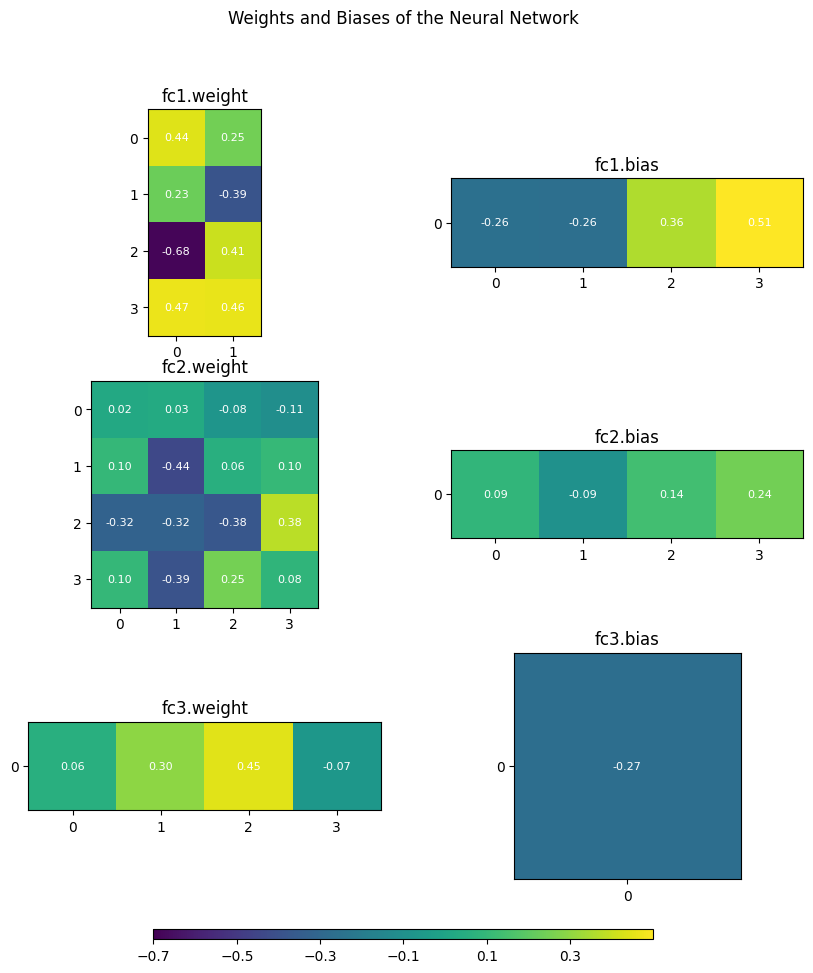

In [52]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def plot_weights(self):
        weights_biases_dict = self.state_dict()
        #weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Definition of columns, rows and subplots
        num_subplots = len(weights_biases_dict)
        num_cols = 2
        num_rows = (num_subplots + num_cols - 1) // num_cols  
        
        # For colorbar (collect minimum and maximum values across all tensors)
        all_values = np.concatenate([tensor.flatten() for tensor in weights_biases_dict.values()])
        min_val = round(all_values.min(), 1)
        max_val = round(all_values.max(), 1)
        
        # Create subplots
        fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))
        
        # Plot images and add values in each subplot
        for i, (key, tensor) in enumerate(weights_biases_dict.items()):
            row = i // num_cols
            col = i % num_cols
            ax = axs[row, col]
            if 'weight' in key:
                im = ax.imshow(tensor, cmap='viridis',vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}')
            elif 'bias' in key:
                im = ax.imshow(tensor.unsqueeze(0), cmap='viridis', vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}')
            #ax.axis('off')
            
            # If the data is 1D (possibly biases), reshape them to (1, len(data))
            if len(tensor.shape) == 1:
                tensor = tensor.reshape(1, -1)

            # Add xticks and yticks
            ax.set_xticks(np.arange(0, tensor.shape[1] , step=1))  
            ax.set_yticks(np.arange(0, tensor.shape[0] , step=1))  
           
            # Add values in the middle of the cell
            for y in range(tensor.shape[0]):
                for x in range(tensor.shape[1]):
                    value = tensor[y, x]
                    ax.text(x, y, f'{value:.2f}', fontsize = 8, color='white', ha='center', va='center')
            
         # Hide extra subplots
        for i in range(num_subplots, num_rows * num_cols):
            axs.flatten()[i].axis('off')
            
        # Add a title to the figure
        plt.suptitle('Weights and Biases of the Neural Network')
        
        # Add a colorbar
            # Set custom ticks and intervals
        tick_interval = 0.2
        ticks = np.arange(min_val, max_val, step=tick_interval)

        cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.01])  # [left, bottom, width, height]
        cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks = ticks)
        #cbar.set_label('Colorbar Label') Label for the Colorbar
        
        # Show the plots
        plt.show()

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)
# Call the plot_weights method
model.plot_weights()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def plot_weights(self):
        state_dict = self.state_dict()
        weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Create a figure for visualization
        num_plots = len(weights_biases_dict)
        fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))

        # Plot the weights and biases for each layer
        #max_intensity = 0  # Track the maximum intensity across all plots
        for i, (key, data) in enumerate(weights_biases_dict.items()):
            ax = axes[i] if num_plots > 1 else axes
            if 'bias' in key:
                title = f'{key} (Biases)'
            elif 'weight' in key:
                title = f'{key} (Weights)'
                
            if len(data.shape) == 1:
                # If the data is 1D (possibly biases), reshape them to (1, len(data))
                data = data.reshape(1, -1)
                
            im = ax.imshow(data.numpy(), cmap='viridis', interpolation='none')

            # Add numbers to the cells
            for i in range(data.shape[0]):
                for j in range(data.shape[1]):
                    ax.text(j, i, f'{data[i, j]:.2f}', color='white', ha='center', va='center')

            ax.set_title(title)
            #max_intensity = max(max_intensity, np.max(np.abs(data.numpy())))  # Update max intensity

        # Add a colorbar below all the plots
        #divider = make_axes_locatable(ax)
        #cax = divider.append_axes("bottom", size="5%", pad=0.5)
        #cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
        #cbar.set_label('Value')

        # Normalize the color bar based on the maximum intensity across all plots
        #cbar.set_clim(-max_intensity, max_intensity)

        # Show the plots
        plt.show()

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Call the plot_weights method
model.plot_weights()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def plot_weights(self):
        state_dict = self.state_dict()
        weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Create a figure for visualization
        num_plots = len(weights_biases_dict)
        fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))

        # Plot the weights and biases for each layer
        max_intensity = 0  # Track the maximum intensity across all plots
        for i, (key, data) in enumerate(weights_biases_dict.items()):
            ax = axes[i] if num_plots > 1 else axes
            if 'bias' in key:
                title = f'{key} (Biases)'
            elif 'weight' in key:
                title = f'{key} (Weights)'
                
            if len(data.shape) == 1:
                # If the data is 1D (possibly biases), reshape them to (1, len(data))
                data = data.reshape(1, -1)
                
            im = ax.imshow(data.numpy(), cmap='viridis', interpolation='none')

            # Add numbers to the cells
            for i in range(data.shape[0]):
                for j in range(data.shape[1]):
                    ax.text(j, i, f'{data[i, j]:.2f}', color='white', ha='center', va='center')

            ax.set_title(title)
            max_intensity = max(max_intensity, np.max(np.abs(data.numpy())))  # Update max intensity

        # Add a colorbar below all the plots
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("bottom", size="5%", pad=0.5)
        cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
        cbar.set_label('Value')

        # Normalize the color bar based on the maximum intensity across all plots
        #cbar.set_clim(-max_intensity, max_intensity)

        # Show the plots
        plt.show()

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Call the plot_weights method
model.plot_weights()


In [ ]:
    def visualize_difference(self, original, new, layer_name):
        plt.figure(figsize=(10, 4))

        # Plot weights
        plt.subplot(1, 2, 1)
        plt.title(f'{layer_name} Weights')
        plt.imshow(original, cmap='viridis')
        plt.colorbar(label='Weight Values')
        plt.xlabel('Neurons in Previous Layer')
        plt.ylabel('Neurons in Current Layer')

        plt.subplot(1, 2, 2)
        plt.title(f'Difference in {layer_name} Weights')
        plt.imshow(new - original, cmap='coolwarm')
        plt.colorbar(label='Weight Difference')
        plt.xlabel('Neurons in Previous Layer')
        plt.ylabel('Neurons in Current Layer')

        plt.tight_layout()
        plt.show()

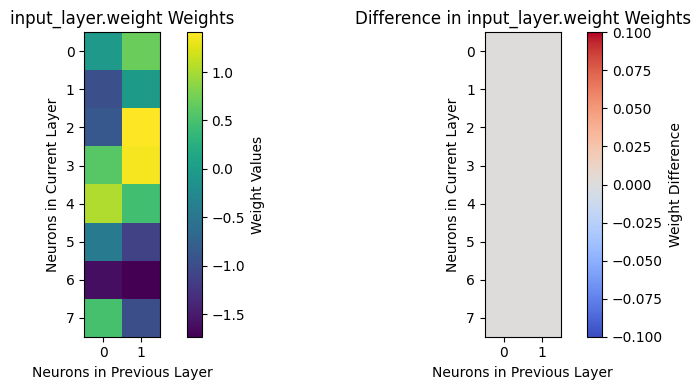

TypeError: Invalid shape (8,) for image data

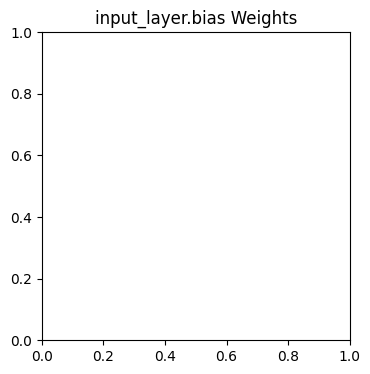

In [1]:
import torch
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt

# Function to visualize the weights and biases
def visualize_difference(original, new, layer_name):
    plt.figure(figsize=(10, 4))
    
    # Plot weights
    plt.subplot(1, 2, 1)
    plt.title(f'{layer_name} Weights')
    plt.imshow(original, cmap='viridis')
    plt.colorbar(label='Weight Values')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.subplot(1, 2, 2)
    plt.title(f'Difference in {layer_name} Weights')
    plt.imshow(new - original, cmap='coolwarm')
    plt.colorbar(label='Weight Difference')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.tight_layout()
    plt.show()

# Function to create a model with specified initialization
def create_model(input_size, hidden_layers, output_size, initialization='he'):
    model = nn.Sequential()
    
    # Add input layer
    model.add_module('input_layer', nn.Linear(input_size, hidden_layers[0]))
    if initialization == 'he':
        init.kaiming_uniform_(model.input_layer.weight.data, mode='fan_in', nonlinearity='relu')
        init.zeros_(model.input_layer.bias.data)

    # Add hidden layers
    for i in range(len(hidden_layers) - 1):
        layer = nn.Linear(hidden_layers[i], hidden_layers[i + 1])
        model.add_module(f'hidden_layer{i + 1}', layer)
        if initialization == 'he':
            init.kaiming_uniform_(layer.weight.data, mode='fan_in', nonlinearity='relu')
            init.zeros_(layer.bias.data)

    # Add output layer
    model.add_module('output_layer', nn.Linear(hidden_layers[-1], output_size))
    if initialization == 'he':
        init.kaiming_uniform_(model.output_layer.weight.data, mode='fan_in', nonlinearity='linear')
        init.zeros_(model.output_layer.bias.data)

    return model

# Step 1: Create the original model
original_input_size = 2
original_hidden_layers = [8, 8]
original_output_size = 1
original_model = create_model(original_input_size, original_hidden_layers, original_output_size, initialization='he')

# Step 2: Visualize the weights and biases of the original model
for layer_name, original_weight in original_model.named_parameters():
    visualize_difference(original_weight.detach().numpy(), original_weight.detach().numpy(), layer_name)

# Step 3: Create the extended model with 16 neurons in hidden layers
extended_input_size = 2
extended_hidden_layers = [16, 16]
extended_output_size = 1
extended_model = create_model(extended_input_size, extended_hidden_layers, extended_output_size, initialization='he')

# Step 4: Visualize the weights and biases of the extended model
for layer_name, extended_weight in extended_model.named_parameters():
    visualize_difference(extended_weight.detach().numpy(), extended_weight.detach().numpy(), layer_name)

# Step 5: Overwrite the weights and biases of the extended model with the original model
for original_param, extended_param in zip(original_model.parameters(), extended_model.parameters()):
    extended_param.data.copy_(original_param.data)

# Step 6: Visualize the weights and biases of the extended model after overwriting
for layer_name, extended_weight in extended_model.named_parameters():
    visualize_difference(original_weight.detach().numpy(), extended_weight.detach().numpy(), layer_name)


In [3]:
import torch
import torch.nn as nn

# Define a simple fully connected neural network
class MyFCNet(nn.Module):
    def __init__(self):
        super(MyFCNet, self).__init__()
        self.fc1 = nn.Linear(2, 4)  # Example: input size=10, output size=5
        self.fc2 = nn.Linear(4, 1)   # Example: input size=5, output size=2

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the network
model = MyFCNet()

# Get the state_dict of the model
state_dict = model.state_dict()

# Extract weights and biases from the state_dict
for key, value in state_dict.items():
    if 'weight' in key:
        print(f"Layer: {key}, Shape: {value.shape}")
        print("Weights:")
        print(value)
    elif 'bias' in key:
        print(f"Layer: {key}, Shape: {value.shape}")
        print("Biases:")
        print(value)

Layer: fc1.weight, Shape: torch.Size([4, 2])
Weights:
tensor([[-0.3768, -0.1831],
        [ 0.2954,  0.4708],
        [-0.4983, -0.3640],
        [ 0.0533,  0.5452]])
Layer: fc1.bias, Shape: torch.Size([4])
Biases:
tensor([ 0.2016,  0.3234, -0.4490, -0.4836])
Layer: fc2.weight, Shape: torch.Size([1, 4])
Weights:
tensor([[0.0032, 0.1618, 0.2123, 0.1479]])
Layer: fc2.bias, Shape: torch.Size([1])
Biases:
tensor([-0.1865])


In [5]:
import torch

# Example tensor with shape (4,)
tensor = torch.tensor([1, 2, 3, 4])

# Transform the tensor to shape (4, 1)
tensor_reshaped = tensor.unsqueeze(0)

print("Original tensor shape:", tensor.shape)
print("Transformed tensor shape:", tensor_reshaped.shape)

Original tensor shape: torch.Size([4])
Transformed tensor shape: torch.Size([1, 4])


In [6]:
import torch
import torch.nn as nn

# Define a simple model using nn.Sequential
model = nn.Sequential(
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
)

# Print the model architecture
print(model)

# Initialize some input data
input_data = torch.randn(3, 10)

# Forward pass through the model
output = model(input_data)

# Print the output
print("Output shape:", output.shape)

Sequential(
  (0): Linear(in_features=10, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
)
Output shape: torch.Size([3, 1])


In [7]:
# Inspect the model parameters
for name, param in model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([5, 10])
0.bias torch.Size([5])
2.weight torch.Size([1, 5])
2.bias torch.Size([1])


In [8]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1694, -0.0175,  0.2485, -0.2436,  0.1630, -0.2034, -0.0155,  0.2092,
                        0.0168, -0.3125],
                      [-0.3102,  0.2286,  0.1763, -0.0754,  0.1801, -0.0178, -0.1439,  0.0784,
                       -0.0385,  0.1876],
                      [-0.0265, -0.2309,  0.2742,  0.2021, -0.0890,  0.2380,  0.1767,  0.3116,
                       -0.0092,  0.0783],
                      [-0.2298,  0.2019, -0.1662,  0.3080, -0.0226,  0.0054,  0.0538, -0.0820,
                        0.2053,  0.2968],
                      [ 0.0378,  0.0088, -0.2172,  0.1888,  0.0967, -0.2511,  0.0918, -0.1350,
                       -0.1643, -0.1602]])),
             ('0.bias', tensor([ 0.2545, -0.2217,  0.0424,  0.0427,  0.1541])),
             ('2.weight',
              tensor([[ 0.3897, -0.3050,  0.3428,  0.1337, -0.4308]])),
             ('2.bias', tensor([0.2469]))])

In [19]:
import torch
import torch.nn as nn

class SimpleModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super().__init__()

        self.input_layer = nn.Sequential(
            nn.Linear(input_size, hidden_sizes[0]),
            nn.ReLU()
        )

        self.hidden_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(hidden_sizes[i], hidden_size),
                nn.ReLU()
            ) for i, hidden_size in enumerate(hidden_sizes[1:])
        ])

        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    def forward(self, x):
        x = self.input_layer(x)
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.output_layer(x)
        return x

# Example usage
input_size = 2
hidden_sizes = [4, 8, 8, 4]
output_size = 1

model = SimpleModel(input_size, hidden_sizes, output_size)
print(model)


SimpleModel(
  (input_layer): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
  )
  (hidden_layers): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
    )
    (1): Sequential(
      (0): Linear(in_features=8, out_features=8, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=8, out_features=4, bias=True)
      (1): ReLU()
    )
  )
  (output_layer): Linear(in_features=4, out_features=1, bias=True)
)


In [20]:
model.state_dict()

OrderedDict([('input_layer.0.weight',
              tensor([[ 0.4499,  0.1669],
                      [ 0.2086, -0.0383],
                      [ 0.3971,  0.6921],
                      [ 0.3076,  0.6195]])),
             ('input_layer.0.bias',
              tensor([-0.3317, -0.0987,  0.0671, -0.0198])),
             ('hidden_layers.0.0.weight',
              tensor([[-0.0568, -0.0919, -0.2077,  0.2710],
                      [ 0.4806,  0.4894,  0.2627,  0.2127],
                      [-0.0899,  0.4091, -0.3066,  0.2771],
                      [-0.4737,  0.0188,  0.1050, -0.2054],
                      [ 0.4502, -0.4275, -0.0955,  0.0234],
                      [ 0.3170, -0.2768,  0.1480,  0.4919],
                      [-0.2429,  0.2785,  0.3169, -0.1077],
                      [ 0.1398, -0.3523,  0.1830,  0.2745]])),
             ('hidden_layers.0.0.bias',
              tensor([-0.0149,  0.0193, -0.0416, -0.4391,  0.2617, -0.3121,  0.0881, -0.4399])),
             ('hidden_layers.1.0

In [27]:
import torch

# Example weight matrix (2x3) and bias vector (2,)
W = torch.randn(2, 3)
x = torch.randn(3)
b = torch.randn(2)

In [28]:
W

tensor([[-0.2265,  1.6277, -0.7819],
        [ 0.7404,  1.3275,  1.6231]])

In [29]:
x

tensor([-0.3024, -1.5350, -0.8116])

In [30]:
b

tensor([ 0.2633, -0.3738])

In [31]:
# Perform matrix multiplication
result = torch.matmul(W, x)
result

tensor([-1.7956, -3.5790])

In [32]:
# Add bias vector element-wise to each row of the result
result_with_bias = result + b



In [33]:
print("Result with bias:", result_with_bias)

Result with bias: tensor([-1.5323, -3.9528])


In [1]:
import torch
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt

In [ ]:
# Define the architecture of the original network
original_input_size = 2
original_hidden_layers = [8, 8]
original_output_size = 1

In [ ]:
# Create the original model with Xavier initialization
class OriginalModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(OriginalModel, self).__init__()
        
        # Input layer
        self.input_layer = nn.Linear(input_size, hidden_layers[0])
        init.xavier_uniform_(self.input_layer.weight.data, gain=nn.init.calculate_gain('relu'))
        init.zeros_(self.input_layer.bias.data)
        
        # Hidden layers with Xavier initialization
        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers)-1)
        ])
        for layer in self.hidden_layers:
            init.xavier_uniform_(layer.weight.data, gain=nn.init.calculate_gain('relu'))
            init.zeros_(layer.bias.data)
        
        # Output layer with Xavier initialization
        self.output_layer = nn.Linear(hidden_layers[-1], output_size)
        init.xavier_uniform_(self.output_layer.weight.data, gain=nn.init.calculate_gain('linear'))
        init.zeros_(self.output_layer.bias.data)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

In [ ]:






# Create an instance of the original model
original_model = OriginalModel(original_input_size, original_hidden_layers, original_output_size)

# Define the architecture of the new network with increased neurons
new_input_size = 2
new_hidden_layers = [16, 16]  # Increase the number of neurons
new_output_size = 1

# Create a new model with the same architecture as the original one
class NewModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(NewModel, self).__init__()
        
        # Input layer
        self.input_layer = nn.Linear(input_size, hidden_layers[0])
        
        # Hidden layers with weights and biases from the original model
        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers)-1)
        ])
        
        # Output layer
        self.output_layer = nn.Linear(hidden_layers[-1], output_size)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

# Create an instance of the new model
new_model = NewModel(new_input_size, new_hidden_layers, new_output_size)

# Set the weights from the original model using He initialization
def initialize_weights_he(model):
    for layer in model.modules():
        if isinstance(layer, nn.Linear):
            init.kaiming_uniform_(layer.weight.data, mode='fan_in', nonlinearity='relu')
            init.zeros_(layer.bias.data)

# Initialize weights of the new model using He initialization
initialize_weights_he(new_model)

# Visualize the differences in weights and biases
def visualize_difference(original, new, layer_name):
    plt.figure(figsize=(10, 4))
    
    # Plot weights
    plt.subplot(1, 2, 1)
    plt.title(f'{layer_name} Weights')
    plt.imshow(original, cmap='viridis')
    plt.colorbar(label='Weight Values')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.subplot(1, 2, 2)
    plt.title(f'Difference in {layer_name} Weights')
    plt.imshow(new - original, cmap='coolwarm')
    plt.colorbar(label='Weight Difference')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.tight_layout()
    plt.show()

# Visualize differences for each layer
for layer_name, original_weight in original_model.state_dict().items():
    new_weight = new_model.state_dict()[layer_name]
    visualize_difference(original_weight, new_weight, layer_name)

# Visualize differences for biases
for layer_name, original_bias in original_model.state_dict().items():
    if 'bias' in layer_name:
        new_bias = new_model.state_dict()[layer_name]
        visualize_difference(original_bias.unsqueeze(0), new_bias.unsqueeze(0), layer_name + ' Bias')


In [6]:
import torch

def find_max_min_values(state_dict):
    max_value = float('-inf')
    min_value = float('inf')

    for key, tensor in state_dict.items():
        if isinstance(tensor, torch.Tensor):
            if tensor.dim() == 0:
                tensor_max = tensor.item()
                tensor_min = tensor.item()
            else:
                tensor_max = torch.max(tensor).item()
                tensor_min = torch.min(tensor).item()
            max_value = max(max_value, tensor_max)
            min_value = min(min_value, tensor_min)

    return max_value, min_value

# Example usage
model = YourModel()  # Instantiate your model
state_dict = model.state_dict()

max_value, min_value = find_max_min_values(state_dict)
print("Max value:", max_value)
print("Min value:", min_value)


NameError: name 'YourModel' is not defined